
Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [15]:
# Import dataset and print first few rows
import pandas as pd
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [16]:
# Drop NA's and dummify categorical variables
penguins = penguins.dropna()
penguins = pd.get_dummies(penguins, columns=["species", "island", "sex", "year"]) # I am including year because I want to treat it as categorical

# Let's change the boolean true/false outputs to 0's for false and 1's for true
new_columns = ["species_Adelie", "species_Chinstrap", "species_Gentoo", "island_Biscoe", "island_Dream", "island_Torgersen", "sex_female", "sex_male", "year_2007", "year_2008", "year_2009"]
penguins[new_columns] = penguins[new_columns].astype(int)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,year_2007,year_2008,year_2009
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0,1,0,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0,1,0,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0,1,0,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1,1,0,0


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [17]:
# Best linear regression model from PA 6.2 (which had every possible predictor variable minus one reference variable for each categorical variable)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y = penguins["bill_depth_mm"]
X = penguins[["species_Adelie", "species_Chinstrap", "island_Biscoe", "island_Dream", "bill_length_mm", "flipper_length_mm", "body_mass_g", "sex_male", "year_2007", "year_2008"]]
lr_fit = lr.fit(X, y) # fit on entire dataset this time

y_preds_lr = lr_fit.predict(X)

In [18]:
# kNN model with K=5
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"]) # a dummifying step is not needed here since the categorical variables have already been dummified
  ],
  remainder = "passthrough"
)

knn_regression_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_regression", KNeighborsRegressor(n_neighbors=5))]
)

# Fit on entire dataset
knn_regression_pipeline_fitted = knn_regression_pipeline.fit(X, y)
y_preds_knn = knn_regression_pipeline_fitted.predict(X)

In [19]:
# kNN model with K=20

knn_regression_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("knn_regression", KNeighborsRegressor(n_neighbors=20))]
)

# Fit on entire dataset
knn_regression_pipeline_2_fitted = knn_regression_pipeline_2.fit(X, y)
y_preds_knn_2 = knn_regression_pipeline_2_fitted.predict(X)

In [20]:
# decision tree model with min_impurity_decrease = 0.01
from sklearn.tree import DecisionTreeRegressor

dt_regression_pipeline = Pipeline(
  [("preprocessing", ct),
  ("dt_regression", DecisionTreeRegressor(min_impurity_decrease=0.01))]
)

# Fit on entire dataset
dt_regression_pipeline_fitted = dt_regression_pipeline.fit(X, y)
y_preds_dt = dt_regression_pipeline_fitted.predict(X)

# Create plot with training and test error for each model

In [21]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Fit models on training data
lr_fit = lr.fit(X_train, y_train)
knn_fit = knn_regression_pipeline.fit(X_train, y_train)
knn_fit_2 = knn_regression_pipeline_2.fit(X_train, y_train)
dt_fit = dt_regression_pipeline.fit(X_train, y_train)

# Training predictions
y_preds_lr_train = lr_fit.predict(X_train)
y_preds_knn_train = knn_fit.predict(X_train)
y_preds_knn_2_train = knn_fit_2.predict(X_train)
y_preds_dt_train = dt_fit.predict(X_train)

# Test predictions
y_preds_lr_test = lr_fit.predict(X_test)
y_preds_knn_test = knn_fit.predict(X_test)
y_preds_knn_2_test = knn_fit_2.predict(X_test)
y_preds_dt_test = dt_fit.predict(X_test)

In [23]:
# Calculate training and test errors for each of the four models
from sklearn.metrics import mean_squared_error

lr_train_error = mean_squared_error(y_train, y_preds_lr_train)
lr_test_error = mean_squared_error(y_test, y_preds_lr_test)

knn_train_error = mean_squared_error(y_train, y_preds_knn_train)
knn_test_error = mean_squared_error(y_test, y_preds_knn_test)

knn_2_train_error = mean_squared_error(y_train, y_preds_knn_2_train)
knn_2_test_error = mean_squared_error(y_test, y_preds_knn_2_test)

dt_train_error = mean_squared_error(y_train, y_preds_dt_train)
dt_test_error = mean_squared_error(y_test, y_preds_dt_test)

In [24]:
errors = pd.DataFrame({"model": ["lr_model", "knn_model", "knn_2_model", "dt_model"],
                        "train_mse": [lr_train_error, knn_train_error, knn_2_train_error, dt_train_error],
                        "test_mse": [lr_test_error, knn_test_error, knn_2_test_error, dt_test_error]})

errors.head()

,model,train_mse,test_mse
0,lr_model,0.522945,0.889200
1,knn_model,0.384792,0.821922
2,knn_2_model,0.538284,0.902873
3,dt_model,0.395882,0.887808


In [25]:
# Melt data so that type of error and the errors themselves are separate columns
errors_long = errors.melt(id_vars=["model"], var_name="type_of_error", value_name="mse")
errors_long

,model,type_of_error,mse
0,lr_model,train_mse,0.522945
1,knn_model,train_mse,0.384792
2,knn_2_model,train_mse,0.538284
3,dt_model,train_mse,0.395882
4,lr_model,test_mse,0.889200
5,knn_model,test_mse,0.821922
6,knn_2_model,test_mse,0.902873
7,dt_model,test_mse,0.887808


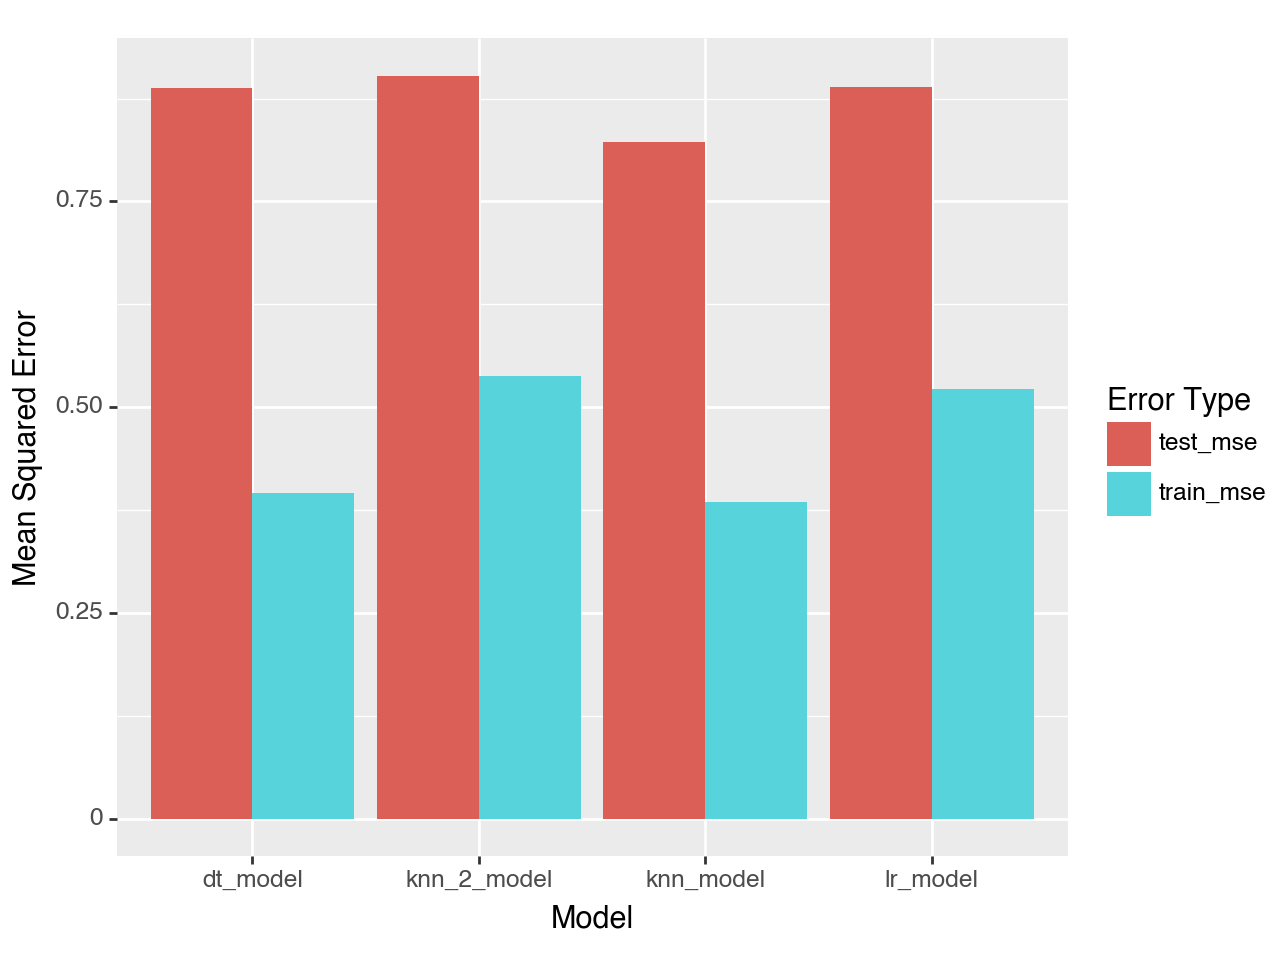

<Figure Size: (640 x 480)>

In [26]:
from plotnine import *

(ggplot(errors_long,
aes(
    x="model",
    y="mse",
    fill="type_of_error"
    ))
+ geom_bar(stat="identity", position="dodge")
+ labs(x="Model", y="Mean Squared Error", fill="Error Type")
)



Based on the calculated MSE's and the above plot, **the KNN model with K=5 performed the best**. It has the lowest training MSE (0.38) out of all the models *and* the lowest test MSE out of all the models (0.82).

